In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uber = pd.read_csv('uber.csv') 

In [3]:
uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
uber.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [16]:
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [17]:
uber2 = uber.drop(['Unnamed: 0', 'key'], axis=1)
uber2.dropna(axis=0, inplace = True)

In [18]:
uber2.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [19]:
def finddis(lon1,lon2,lat1,lat2):
    lon1,lon2,lat1,lat2 = map(np.radians,[lon1,lon2,lat1,lat2])
    
    diflon = lon2-lon1
    diflat = lat2-lat1
    
    km = 2*6371*np.arcsin(np.sqrt(np.sin(diflat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(diflon/2.0)**2))
    return km

In [20]:
uber2['Distance'] = finddis(uber2['pickup_longitude'], uber2['dropoff_longitude'], uber2['pickup_latitude'], uber2['dropoff_latitude'])
uber2['Distace'] = uber2['Distance'].astype(float).round(2)

Text(0, 0.5, 'fare')

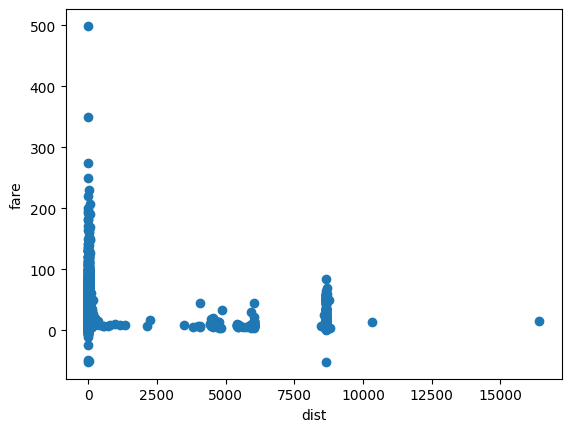

In [22]:
plt.scatter(uber2['Distance'],uber2['fare_amount'])
plt.xlabel('dist')
plt.ylabel('fare')

In [23]:
uber2

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Distace
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,4.48
...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,0.11
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050,1.88
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319,12.85
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715,3.54


In [24]:
uber2.drop(uber2[uber2['Distance']>60].index, inplace = True)
uber2.drop(uber2[uber2['Distance'] == 0].index, inplace = True)
uber2.drop(uber2[uber2['fare_amount'] == 0].index, inplace = True)
uber2.drop(uber2[uber2['fare_amount'] < 0].index, inplace = True)

In [29]:
#uber2.drop(uber2[(uber2['fare_amount']>100) & (uber2['Distance']<1)].index, inplace = True )
#uber2.drop(uber2[(uber2['fare_amount']<100) & (uber2['Distance']>100)].index, inplace = True )
uber2.drop(uber2[(uber2['fare_amount']>100) & (uber2['Distance']<1)].index,inplace = True)
uber2.drop(uber2[(uber2['fare_amount']<100) & (uber2['Distance']>100)].index,inplace = True)

In [30]:
uber2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193830 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193830 non-null  float64
 1   pickup_datetime    193830 non-null  object 
 2   pickup_longitude   193830 non-null  float64
 3   pickup_latitude    193830 non-null  float64
 4   dropoff_longitude  193830 non-null  float64
 5   dropoff_latitude   193830 non-null  float64
 6   passenger_count    193830 non-null  int64  
 7   Distance           193830 non-null  float64
 8   Distace            193830 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 14.8+ MB


Text(0, 0.5, 'FA')

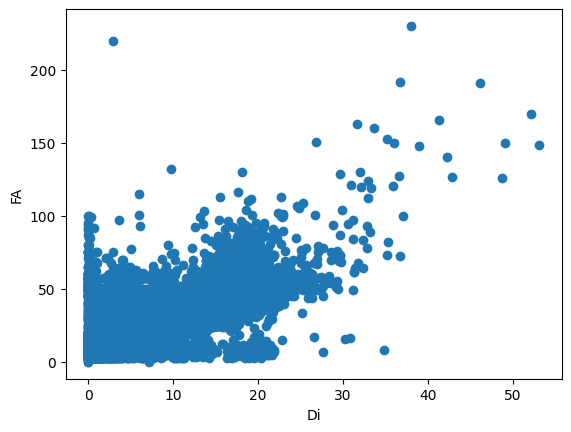

In [33]:
plt.scatter(uber2['Distace'],uber2['fare_amount'])
plt.xlabel('Di')
plt.ylabel('FA')

In [34]:
corr = uber2.corr()
corr.style.background_gradient(cmap = 'BuGn')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Distace
fare_amount,1.000000,0.011970,-0.008610,0.010464,-0.008621,0.012949,0.884952,0.884949
pickup_longitude,0.011970,1.000000,-0.949098,0.999883,-0.993974,0.009175,0.005355,0.005356
pickup_latitude,-0.008610,-0.949098,1.000000,-0.949094,0.954759,-0.009219,0.003202,0.003200
dropoff_longitude,0.010464,0.999883,-0.949094,1.000000,-0.993961,0.009169,0.004425,0.004426
dropoff_latitude,-0.008621,-0.993974,0.954759,-0.993961,1.000000,-0.009266,-0.002150,-0.002152
passenger_count,0.012949,0.009175,-0.009219,0.009169,-0.009266,1.000000,0.007746,0.007743
Distance,0.884952,0.005355,0.003202,0.004425,-0.002150,0.007746,1.000000,1.000000
Distace,0.884949,0.005356,0.003200,0.004426,-0.002152,0.007743,1.000000,1.000000


In [35]:
X = uber2['Distance'].values.reshape(-1,1)
Y = uber2['fare_amount'].values.reshape(-1,1)

In [36]:
from sklearn.preprocessing import StandardScaler

In [43]:
std = StandardScaler()
ystd = std.fit_transform(Y)
print("Y Trans" ,ystd)

xstd = std.fit_transform(X)
print("X TR" ,xstd)

Y Trans [[-0.40064709]
 [-0.37971448]
 [ 0.16453348]
 ...
 [ 2.04846873]
 [ 0.33199439]
 [ 0.29012917]]
X TR [[-0.46344986]
 [-0.24831918]
 [ 0.46819873]
 ...
 [ 2.63930811]
 [ 0.05235019]
 [ 0.57417274]]


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
xtrain,xtest,ytrain,ytest = train_test_split(xstd,ystd,test_size=0.2,random_state=0)

In [50]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(xtrain,ytrain)

print("Training set score: {:.2f}".format(lreg.score(xtrain,ytrain)))
print("Testing set score: {:.2f}".format(lreg.score(xtest,ytest)))

Training set score: 0.78
Testing set score: 0.79


In [56]:
ypred = lreg.predict(xtest)
df = {'Actual' :ytest, 'Predicted':ypred}

In [59]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score

In [63]:
print("LR Model")
print("MSE", mean_squared_error(ytest,ypred))
print("MAE", mean_absolute_error(ytest,ypred))
print("R2 Score", metrics.r2_score(ytest,ypred))
print("RMSE", np.sqrt(mean_squared_error(ytest,ypred)))

LR Model
MSE 0.20711013307088585
MAE 0.24325551248201457
R2 Score 0.7903591348178967
RMSE 0.4550935432093998


In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rrreg = RandomForestRegressor(n_estimators = 10, random_state=0)

In [ ]:
y_pred = rrreg.predict(xtest)
